In [2]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt
import abc

import numpy as np
import pandas as pd
from numpy import linalg
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
import time

In [3]:
class BaseLoss(abc.ABC):
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        
        raise NotImplementedError

In [4]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        Q = ((linalg.norm(np.dot(X,w) - y))**2)/len(y)
        return Q
        
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        L = np.dot(X,w) - y
        Xt = np.transpose(X)
        Grad = 2*np.dot(Xt, L)/len(y)
        return Grad

In [5]:
loss = MSELoss()

X = np.arange(200).reshape(20, 10)
y = np.arange(20)

w = np.arange(10)

print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


In [6]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:    
    W = []
    
    for i in range(n_iterations):
        w_init_new = w_init - lr*loss.calc_grad(X, y, w_init)
        W.append(w_init_new)
        w_init = w_init_new
        
    return W
   

In [7]:
np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [8]:
loss = MSELoss()

In [9]:
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)

In [11]:
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

155.2625821435192
0.8670644395649494


In [12]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):

    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

длина шага 0.0001


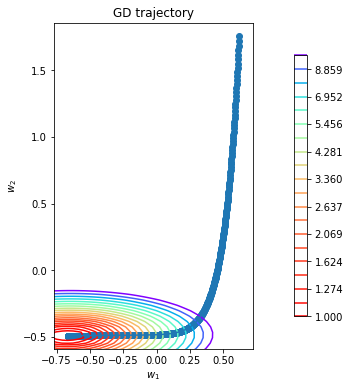

длина шага 0.001


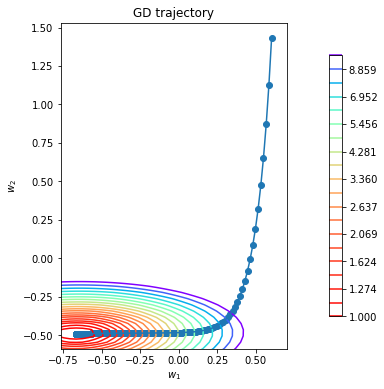

длина шага 0.01


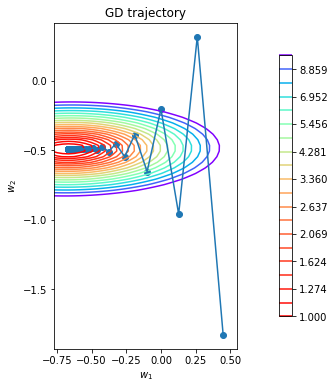

длина шага 0.012


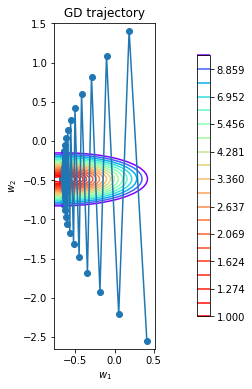

In [13]:
lr = [0.0001, 0.001, 0.01, 0.012]

for i in range(len(lr)):
    w_list = gradient_descent(w_init, X, y, loss, lr[i])
    print('длина шага', lr[i])
    plot_gd(w_list, X, y, loss)

✅ Реализуйте функцию `stochastic_gradient_descent`

In [28]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    
    W = []
    
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        w_init_new = w_init - lr*loss.calc_grad(X_batch, y_batch, w_init)
        W.append(w_init_new)
        w_init = w_init_new
        
    return W

batch_size =  1 , lr =  0.0001
 --- 0.10000371932983398 seconds ---


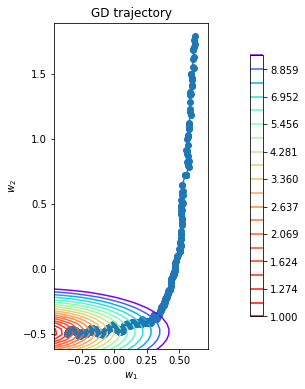

batch_size =  1 , lr =  0.001
 --- 0.08300662040710449 seconds ---


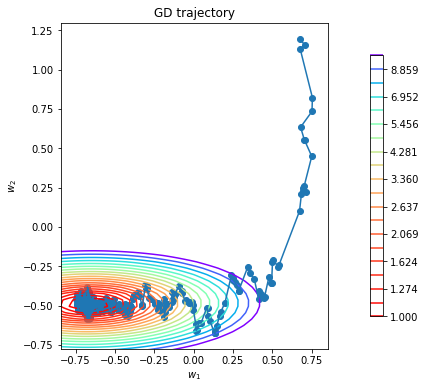

batch_size =  1 , lr =  0.01
 --- 0.10300350189208984 seconds ---


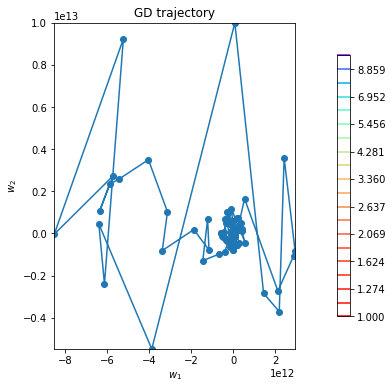

batch_size =  1 , lr =  0.012
 --- 0.0720219612121582 seconds ---


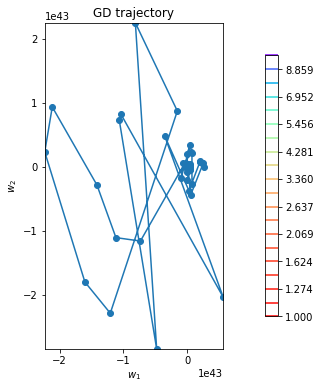

batch_size =  10 , lr =  0.0001
 --- 0.11799216270446777 seconds ---


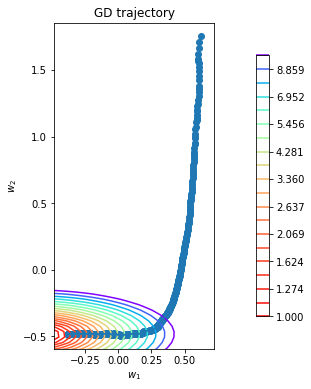

batch_size =  10 , lr =  0.001
 --- 0.09532308578491211 seconds ---


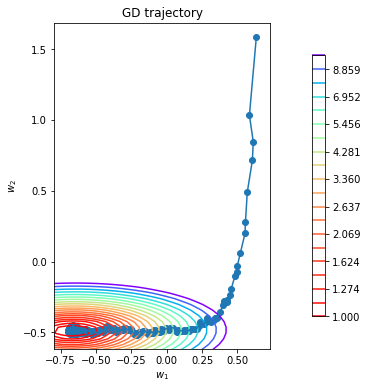

batch_size =  10 , lr =  0.01
 --- 0.08498382568359375 seconds ---


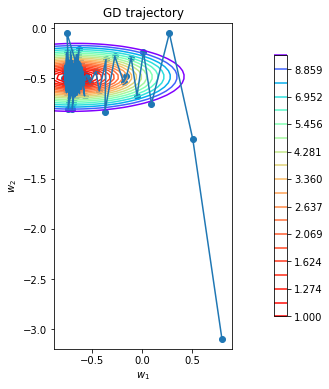

batch_size =  10 , lr =  0.012
 --- 0.059003353118896484 seconds ---


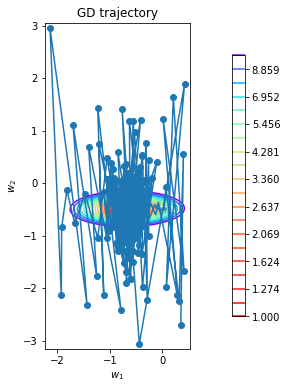

batch_size =  100 , lr =  0.0001
 --- 0.07900762557983398 seconds ---


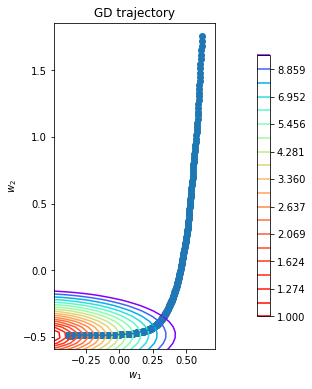

batch_size =  100 , lr =  0.001
 --- 0.08598899841308594 seconds ---


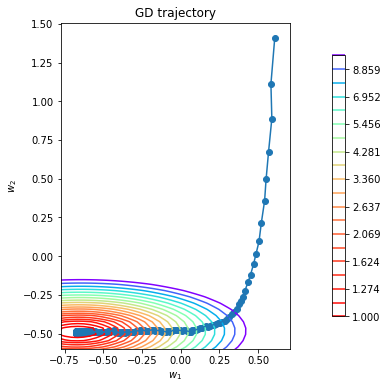

batch_size =  100 , lr =  0.01
 --- 0.0690004825592041 seconds ---


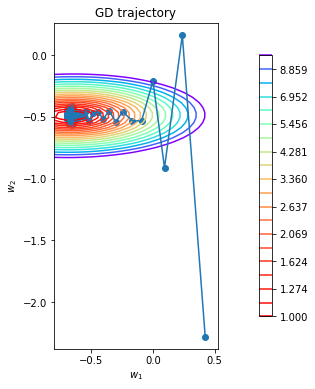

batch_size =  100 , lr =  0.012
 --- 0.10303640365600586 seconds ---


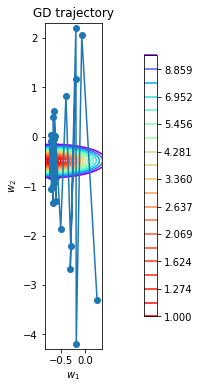

batch_size =  200 , lr =  0.0001
 --- 0.12699317932128906 seconds ---


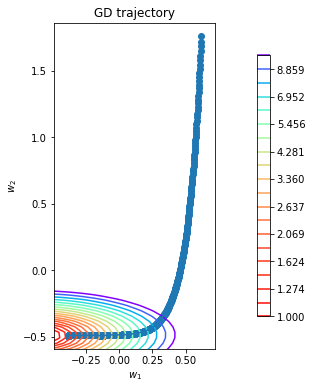

batch_size =  200 , lr =  0.001
 --- 0.07099056243896484 seconds ---


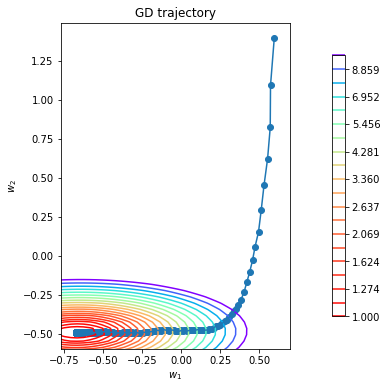

batch_size =  200 , lr =  0.01
 --- 0.09900856018066406 seconds ---


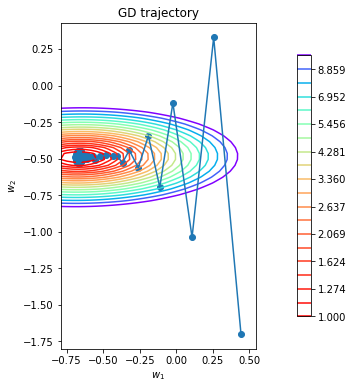

batch_size =  200 , lr =  0.012
 --- 0.08100676536560059 seconds ---


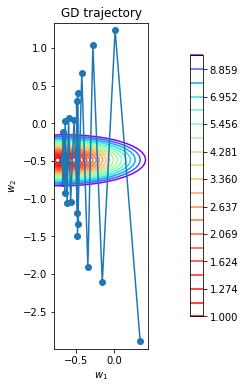

In [30]:
lr = [0.0001, 0.001, 0.01, 0.012]
batch_size = [1, 10, 100, 200]

for j in range(len(batch_size)):
    for i in range(len(lr)):
        start_time = time.time()
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr[i], batch_size[j])
        print('batch_size = ', batch_size[j], ',', 'lr = ', lr[i])
        print(" --- %s seconds ---" % (time.time() - start_time))
        plot_gd(w_list, X, y, loss)

In [34]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    
    s0 = 1
    W = []
    
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        w_init_new = w_init - lr*((s0/(s0 + i))**p)*loss.calc_grad(X_batch, y_batch, w_init)
        W.append(w_init_new)
        w_init = w_init_new
        
    return W

p =  0.1


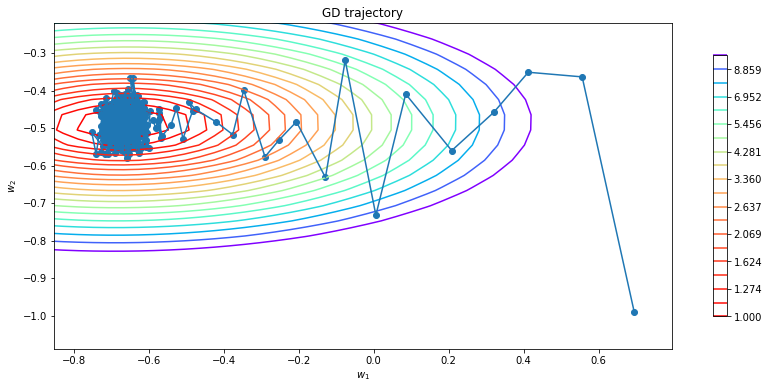

p =  0.3


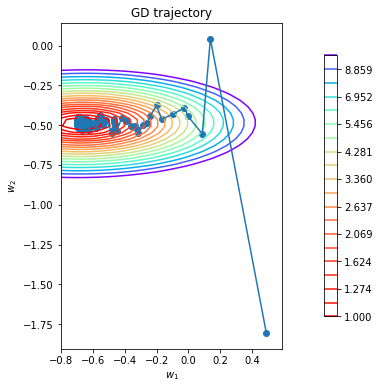

p =  0.6


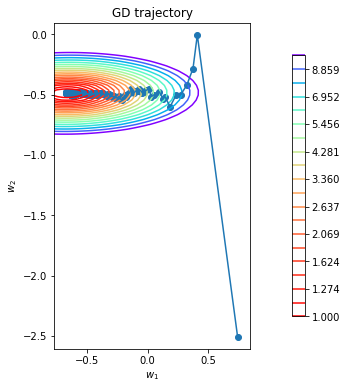

p =  0.9


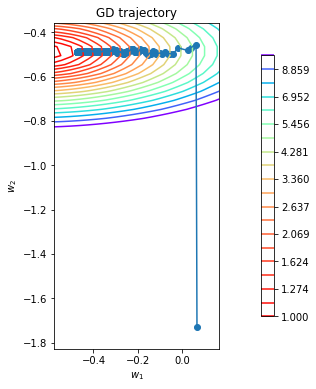

In [35]:
p = [0.1, 0.3, 0.6, 0.9]

for i in range(len(p)):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=0.01, batch_size=10, p = p[i])
    print('p = ', p[i])
    plot_gd(w_list, X, y, loss)

In [36]:
k_sgd = []
sgd = []
loss = MSELoss()

w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=0.01, batch_size=10, p = 0.1, n_iterations=100)
for i in range(len(w_list)):
    losses_sgd = loss.calc_loss(X, y, w_list[i])
    sgd.append(losses_sgd)
    k_sgd.append(i)
    
    
k_gd = []
gd = []
loss = MSELoss()

w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
for i in range(len(w_list)):
    losses_gd = loss.calc_loss(X, y, w_list[i])
    gd.append(losses_gd)
    k_gd.append(i)

Text(0, 0.5, 'Значение ошибки')

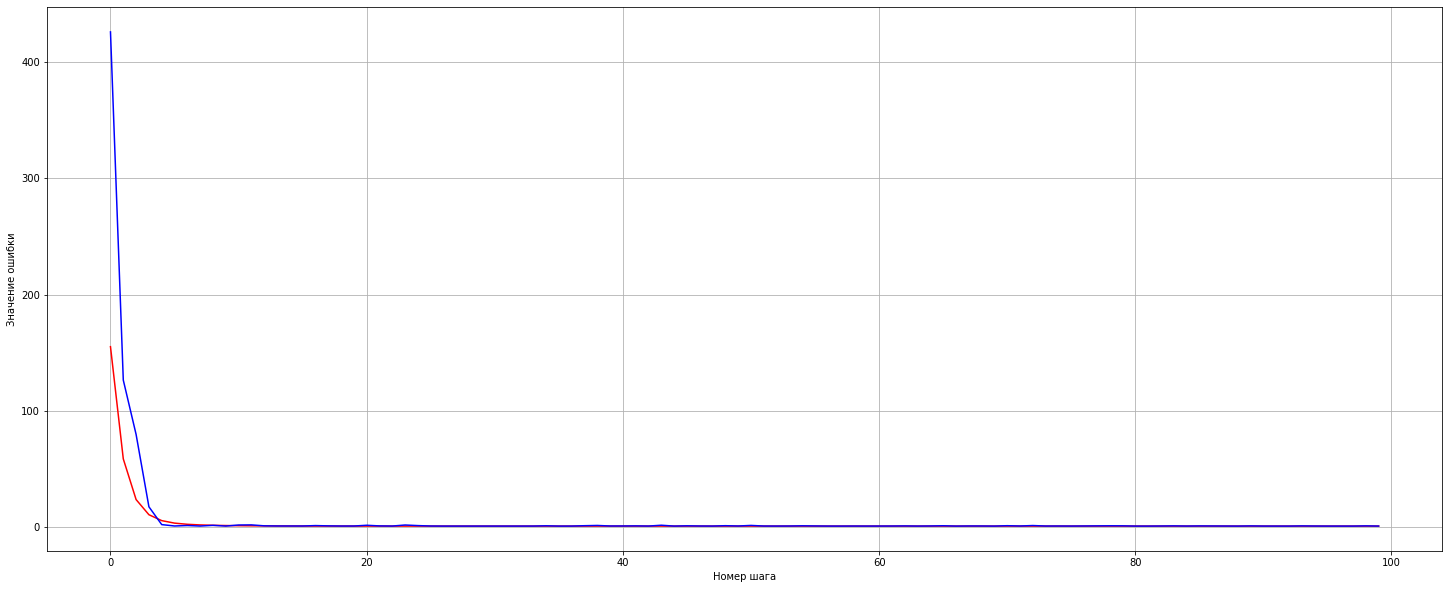

In [38]:
x1 = k_gd
x2 = k_sgd

fig, ax = plt.subplots(figsize=(25,10))

y1 = gd
y2 = sgd

ax.plot(x1, y1, color = 'red', label = 'GD')
ax.plot(x2, y2, color = 'blue', label = 'SGD')

ax.grid(True)

plt.xlabel("Номер шага")
plt.ylabel("Значение ошибки")

In [100]:
class LinearRegression1:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
        self.w = None
        self.g = None

    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        shape_X = X.shape
        
        self.w = np.arange(shape_X[-1])
        self.g = gradient_descent(self.w, X, y, self.loss, lr = self.lr, n_iterations = 100000)
        return self.g[-1]
        
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        assert hasattr(self, "g"), "Linear regression must be fitted first"
        
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y = np.dot(X, self.g[-1])
        
        
        return y

In [40]:
linear_regression = LinearRegression1(MSELoss())

In [69]:
X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)

In [70]:
X_raw

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [71]:
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [72]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [73]:
X_raw.isnull().any().any()

True

In [74]:
nulls = X_raw.isnull().sum()
nulls = nulls[nulls>0]
nulls

1     37
5      2
18     4
19     4
21     2
22     2
dtype: int64

In [75]:
for col in X_raw:
    if X_raw[col].isnull().sum() > 0:
        print(col, ":", X_raw[col].dtypes)

1 : float64
5 : object
18 : float64
19 : float64
21 : float64
22 : float64


In [76]:
X_raw[1] = X_raw[1].fillna(X_raw[1].mean())

In [77]:
X_raw[5].value_counts()

four    113
two      86
Name: 5, dtype: int64

In [78]:
X_raw[5] = X_raw[5].fillna('four')

In [80]:
X_raw.isnull().any().any()

False

In [81]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   201 non-null    int64  
 1   0       201 non-null    int64  
 2   1       201 non-null    float64
 3   2       201 non-null    object 
 4   3       201 non-null    object 
 5   4       201 non-null    object 
 6   5       201 non-null    object 
 7   6       201 non-null    object 
 8   7       201 non-null    object 
 9   8       201 non-null    object 
 10  9       201 non-null    float64
 11  10      201 non-null    float64
 12  11      201 non-null    float64
 13  12      201 non-null    float64
 14  13      201 non-null    int64  
 15  14      201 non-null    object 
 16  15      201 non-null    object 
 17  16      201 non-null    int64  
 18  17      201 non-null    object 
 19  18      201 non-null    float64
 20  19      201 non-null    float64
 21  20      201 non-null    float64
 22  21

In [82]:
columns = [3,4,5,8]

for col in columns:
    print(X_raw[col].unique())

['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['front' 'rear']


In [83]:
for col in columns:
    X_raw[col] = LabelEncoder().fit_transform(X_raw[col])

In [84]:
X_raw = X_raw.drop('index', axis = 1)

In [85]:
cat_mask = X_raw.select_dtypes(include=['object']).columns

In [86]:
X_raw = pd.get_dummies(X_raw, columns=cat_mask, drop_first=True)

In [87]:
X_raw.columns

Index([                0,                 1,                 3,
                       4,                 5,                 8,
                       9,                10,                11,
                      12,                13,                16,
                      18,                19,                20,
                      21,                22,                23,
                      24,          '2_audi',           '2_bmw',
           '2_chevrolet',         '2_dodge',         '2_honda',
               '2_isuzu',        '2_jaguar',         '2_mazda',
       '2_mercedes-benz',       '2_mercury',    '2_mitsubishi',
              '2_nissan',        '2_peugot',      '2_plymouth',
             '2_porsche',       '2_renault',          '2_saab',
              '2_subaru',        '2_toyota',    '2_volkswagen',
               '2_volvo',       '6_hardtop',     '6_hatchback',
               '6_sedan',         '6_wagon',           '7_fwd',
                 '7_rwd',            '14

In [89]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3)

In [95]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 64), (140,), (61, 64), (61,))

In [97]:
from sklearn.preprocessing import StandardScaler

In [101]:
lin_reg = LinearRegression1(MSELoss(), lr=0.01)
lin_reg.fit(X_train, y_train)

array([ -861.1912784 ,  -108.30348948, -2268.85733472,   747.08507115,
        -402.9949947 ,   828.74472162,  1983.0751282 , -1968.07247682,
        1094.56381663,  -895.27746666,  1640.26459639,  7863.53292313,
       -3522.68242958, -1196.97370245, -3463.65518643,  -376.83559725,
         962.56092576,  -319.25272628,  1036.71031872,  1314.33943616,
        1407.56732284,  -261.65754777,  -548.74426757,   774.46514022,
         216.78446619,  -280.22530375,   491.97161228,  1165.81203047,
         188.77578181,  -356.38021861,   621.51397275,  -561.28872926,
        -273.75091707,  1494.9275498 ,   388.58642723,  1632.65073123,
         168.01641088,   -29.85114117,   801.9620259 ,   348.58194139,
        -627.6968001 , -1186.41270214, -1223.25920882,  -914.06929142,
        -689.39156237,   739.20612533,   -75.38117526,  -349.67675862,
         531.62758956,  -643.15079762,  1379.67565342,   655.92940687,
        3376.50152217,   483.62678145,  1252.29296456,    55.        ,
      

In [103]:
from sklearn.metrics import mean_squared_error

In [104]:
print("MSE train", mean_squared_error(y_train, lin_reg.predict(X_train)))
print("MSE test", mean_squared_error(y_test, lin_reg.predict(X_test)))

MSE train 916956.5850322255
MSE test 12589527.917216366


In [105]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        Q = ((linalg.norm(np.dot(X,w) - y))**2)/len(y) + self.coef*linalg.norm(w[:-1]**2)
        return Q
        
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        L = np.dot(X,w)-y
        Xt = np.transpose(X)
        w = np.append(w[:-1], 0)
        Grad = 2*np.dot(Xt, L)/len(y) + 2*self.coef*w
        return Grad

In [106]:
linear_regression = LinearRegression1(MSEL2Loss(0.1))

In [108]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [110]:
alphas = [10, 1, 0.1, 0.01, 0.001, 0.0001]

model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print('best alpha = ', grid.best_estimator_.alpha)
print('MSE test ', mean_squared_error(y_test, grid.predict(X_test)))

best alpha =  1
MSE test  9616185.310209248


In [50]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:

 

In [51]:
class LinearRegression2:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
        self.w = None
        self.g = None

    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
       
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        